# Notebook to run bayesian models

This notebook runs the bayesian linear regression models and the mixed effects models. It is done in notebook form as notebooks keep the diagnostics in the cell output. 

Bayesian model analysis is done in the bayes_model_analysis notebook

In [1]:
from functions.data_functions import load_data, save_pickle, load_pickle
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import bambi as bmb
import arviz as az

## Read in data and preprocess data

In [2]:
pca_df = load_data('BEACON', 'pca_df')

In [3]:
comp = ['comp_1', 'comp_2','comp_3']

In [4]:
for component in comp:
    pca_df[f'{component}_t1_demean'] = pca_df[f'{component}_t1'] - pca_df[f'{component}_t1'].mean()

pca_df['group_ind'] = pca_df['group'].apply(lambda group: 0 if group =='HC' else 1)

In [5]:
pca_df

index G_Number  comp_1_t1  comp_2_t1  comp_3_t1 B_Number  comp_1_t2  \
0        0    G1038  -3.330858  -0.038814   0.053992    B1002  -2.809328   
1        1    G1010  -3.675288  -0.306146   0.425690    B1003  -3.492470   
2        2    G1014  -3.462899  -0.216312   0.492204    B1004  -1.462532   
3        3    G1023  -1.433229  -0.125526   1.165611    B1007  -1.242177   
4        4    G1022  -0.338717   1.220852   0.823205    B1009  -0.717742   
..     ...      ...        ...        ...        ...      ...        ...   
111    111    G2141   2.448469  -0.701650  -0.410376    B2091   1.922807   
112    112    G2138  -1.598782  -0.656621  -1.344820    B2092   0.064752   
113    113    G2140   2.620445  -2.088359  -0.999341    B2093   3.866470   
114    114    G2105   2.303525  -0.276979   0.238688    B2094   4.305718   
115    115    G2049  -0.620213   3.197429   0.126253    B2095  -1.421588   

     comp_2_t2  comp_3_t2 group  comp_1_t1_demean  comp_2_t1_demean  \
0    -1.496931   2.171887    HC         -3.330858         -0.038814   
1    -0.294061  -0.220119    HC         -3.675288         -0.306146   
2     0.474414   0.787114    HC         -3.462899         -0.216312   
3    -0.632335   0.733666    HC         -1.433229         -0.125526   
4     1.259611   2.164392    HC         -0.338717          1.220852   
..         ...        ...   ...               ...               ...   
111   0.933933  -0.793016    AN          2.448469         -0.701650   
112  -0.222998  -0.289193    AN         -1.598782         -0.656621   
113  -2.232530  -0.834078    AN          2.620445         -2.088359   
114  -1.430161   0.215596    AN          2.303525         -0.276979   
115   0.036163   0.029355    AN         -0.620213          3.197429   

     comp_3_t1_demean  group_ind  
0            0.053992          0  
1            0.425690          0  
2            0.492204          0  
3            1.165611          0  
4            0.823205          0  
..                ...        ...  
111         -0.410376          1  
112         -1.344820          1  
113         -0.999341          1  
114          0.238688          1  
115          0.126253          1  

[116 rows x 14 columns]

## Difference at time point one

In [6]:
t1_models = {}

for component in comp:
    ttest = bmb.Model(f'{component}_t1 ~ 0 + group', data=pca_df.dropna())
    print(ttest)
    ttest_results = ttest.fit()
    t1_models[component] = ttest_results

Formula: comp_1_t1 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [13.4596 13.4596])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.4506)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_1_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


Formula: comp_2_t1 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.6578 5.6578])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0301)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_2_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


Formula: comp_3_t1 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.2643 5.2643])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.9585)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_3_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [7]:
save_pickle('t1_models', t1_models)

comp_1 

comp_2 

comp_3 



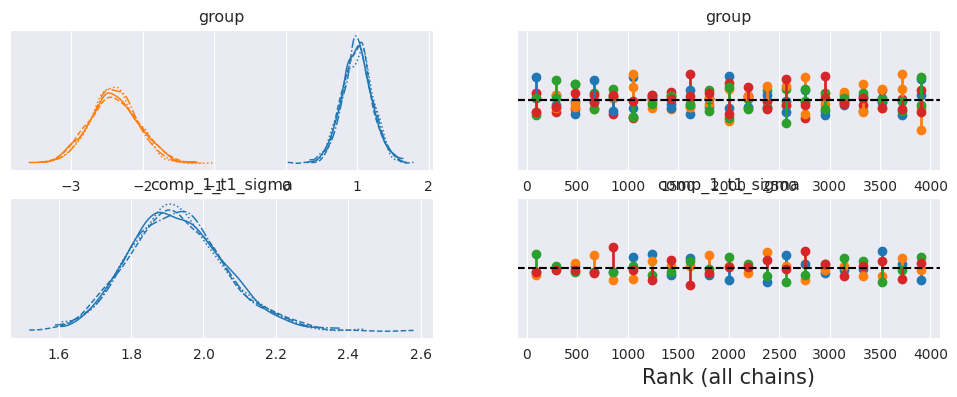

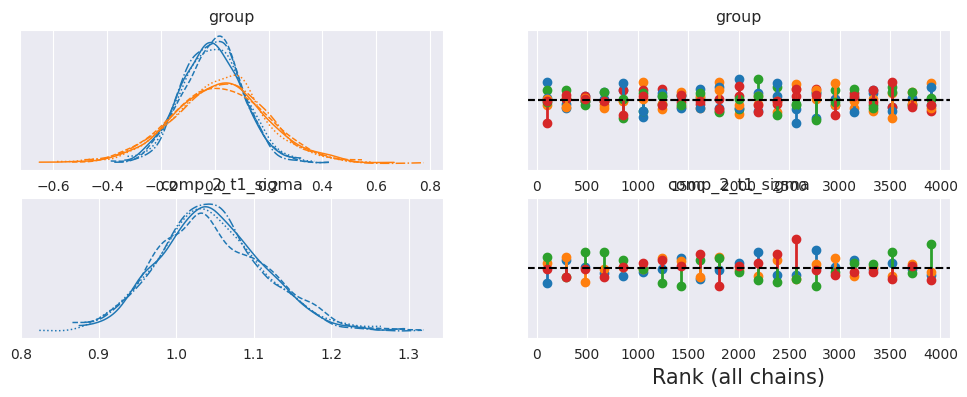

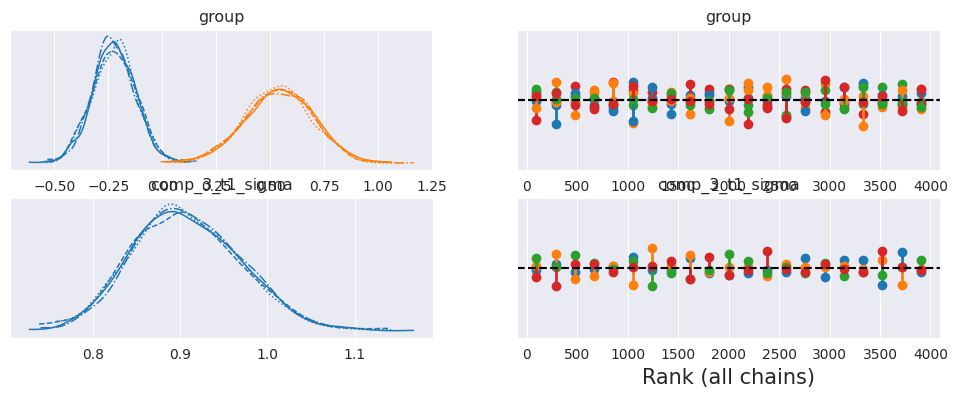

In [8]:
for model in t1_models.keys():
    print(model, '\n')
    az.plot_trace(t1_models[model], kind="rank_vlines")

In [9]:
t2_models = {}

for component in comp:
    ttest_t2 = bmb.Model(f'{component}_t2 ~ 0 + group', data=pca_df.dropna())
    print(ttest_t2)
    ttest_t2_results = ttest_t2.fit()
    t2_models[component] = ttest_t2_results

Formula: comp_1_t2 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [13.0803 13.0803])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.3816)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_1_t2_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


Formula: comp_2_t2 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.8879 5.8879])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.072)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_2_t2_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


Formula: comp_3_t2 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.2325 5.2325])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.9527)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_3_t2_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [10]:
save_pickle('t2_models', t2_models)

comp_1 

comp_2 

comp_3 



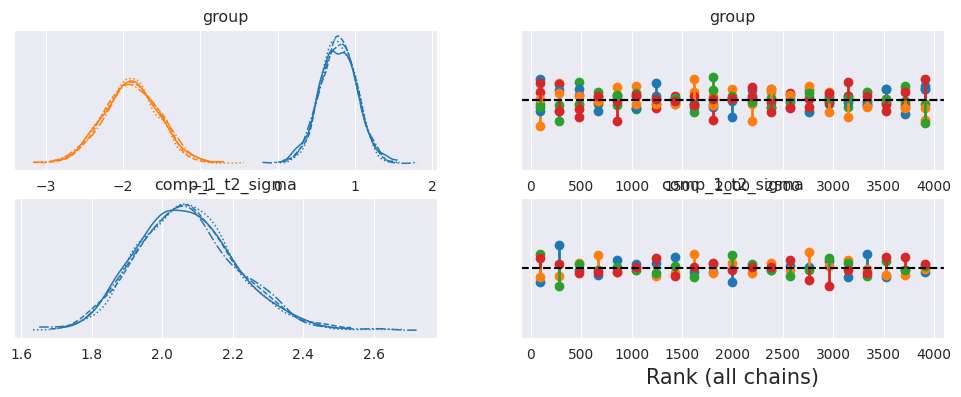

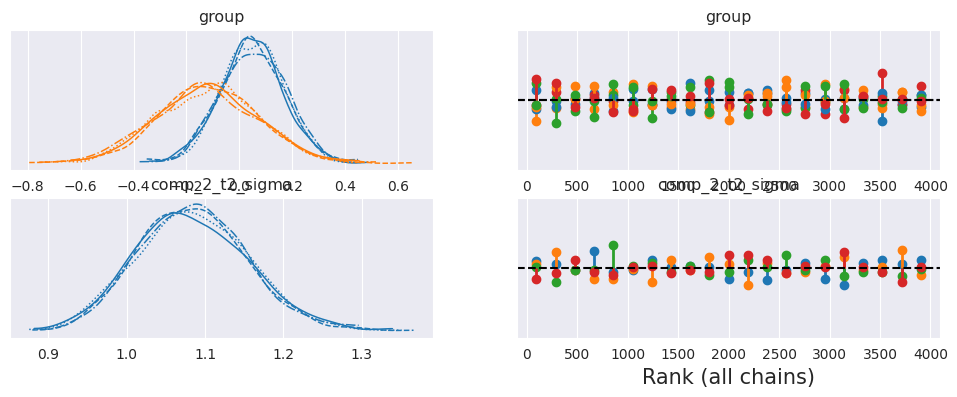

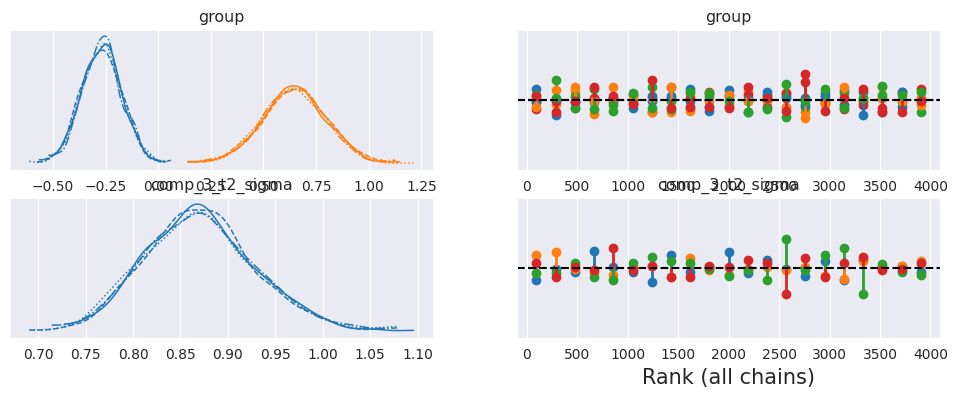

In [11]:
for model in t2_models.keys():
    print(model, '\n')
    az.plot_trace(t2_models[model], kind="rank_vlines")

## Defining and fitting the models

In [12]:
models = {
    'null':{},
    'alternative':{}
}

for model_component in comp:
    null = bmb.Model(f'{model_component}_t2 ~ 0 + (0 + {model_component}_t1_demean|G_Number)', data=pca_df, noncentered=False)
    alternative = bmb.Model(f'{model_component}_t2 ~ 0 + {model_component}_t1_demean + group + (0 + {model_component}_t1_demean|group)', data=pca_df, noncentered=False)

    models['null'][f'{model_component}'] = null
    models['alternative'][f'{model_component}'] = alternative


In [13]:
for alternative_model in models['alternative'].keys():
    print(models['alternative'][alternative_model], '\n')

Formula: comp_1_t2 ~ 0 + comp_1_t1_demean + group + (0 + comp_1_t1_demean|group)
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Common-level effects
    comp_1_t1_demean ~ Normal(mu: 0.0, sigma: 2.4296)
    group ~ Normal(mu: [0. 0.], sigma: [13.0803 13.0803])

  Group-level effects
    comp_1_t1_demean|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.4296))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.3816) 

Formula: comp_2_t2 ~ 0 + comp_2_t1_demean + group + (0 + comp_2_t1_demean|group)
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Common-level effects
    comp_2_t1_demean ~ Normal(mu: 0.0, sigma: 2.6017)
    group ~ Normal(mu: [0. 0.], sigma: [5.8879 5.8879])

  Group-level effects
    comp_2_t1_demean|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.6017))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.072) 

Formula: comp_3_t2 ~ 0 + comp_3_t1_demean + group + (0 + comp_3_t1_demean|group)
Family name: Gauss

In [14]:
for null_models in models['null'].keys():
    print(models['null'][null_models], '\n')

Formula: comp_1_t2 ~ 0 + (0 + comp_1_t1_demean|G_Number)
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Group-level effects
    comp_1_t1_demean|G_Number ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.4296))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.3816) 

Formula: comp_2_t2 ~ 0 + (0 + comp_2_t1_demean|G_Number)
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Group-level effects
    comp_2_t1_demean|G_Number ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.6017))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.072) 

Formula: comp_3_t2 ~ 0 + (0 + comp_3_t1_demean|G_Number)
Family name: Gaussian
Link: identity
Observations: 116
Priors:
  Group-level effects
    comp_3_t1_demean|G_Number ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.4849))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.9527) 



In [15]:
draw_numb = 2000
tune_numb = 3000
target_accept_numb = 0.95

In [16]:
fitted_models ={
    'null':{},
    'alternative':{}
}

for alternative_model in models['alternative'].keys():
    alternative_fitted = models['alternative'][alternative_model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    print('\n')
    fitted_models['alternative'][alternative_model] = alternative_fitted

for null_model in models['null'].keys():
    null_fitted = models['null'][null_model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    print('\n')
    fitted_models['null'][null_model] = null_fitted

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_1_t1_demean, group, comp_1_t1_demean|group_sigma, comp_1_t1_demean|group, comp_1_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 133 seconds.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8836, but should be close to 0.95. Try to increase the number of tuning steps.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_2_t1_demean, group, comp_2_t1_demean|group_sigma, comp_2_t1_demean|group, comp_2_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 112 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_3_t1_demean, group, comp_3_t1_demean|group_sigma, comp_3_t1_demean|group, comp_3_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 119 seconds.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8469, but should be close to 0.95. Try to increase the number of tuning steps.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_1_t1_demean|G_Number_sigma, comp_1_t1_demean|G_Number, comp_1_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 52 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_2_t1_demean|G_Number_sigma, comp_2_t1_demean|G_Number, comp_2_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 51 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_3_t1_demean|G_Number_sigma, comp_3_t1_demean|G_Number, comp_3_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 52 seconds.


In [17]:
save_pickle('fitted_models_group', fitted_models)

## MCMC/model diagnositics

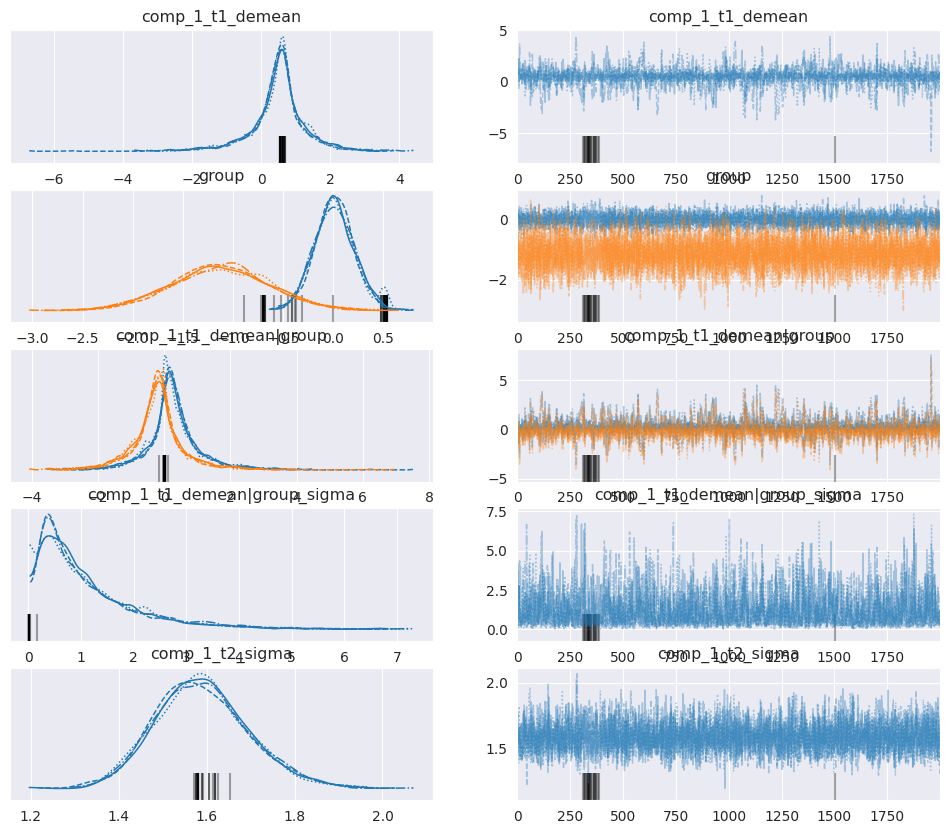

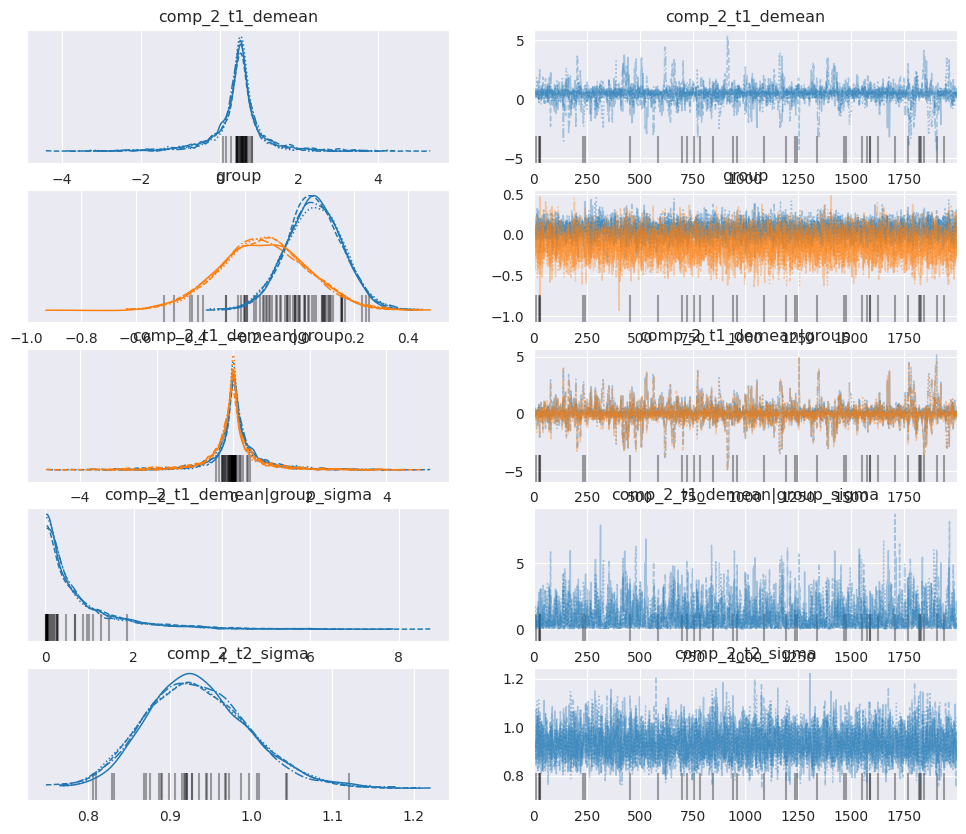

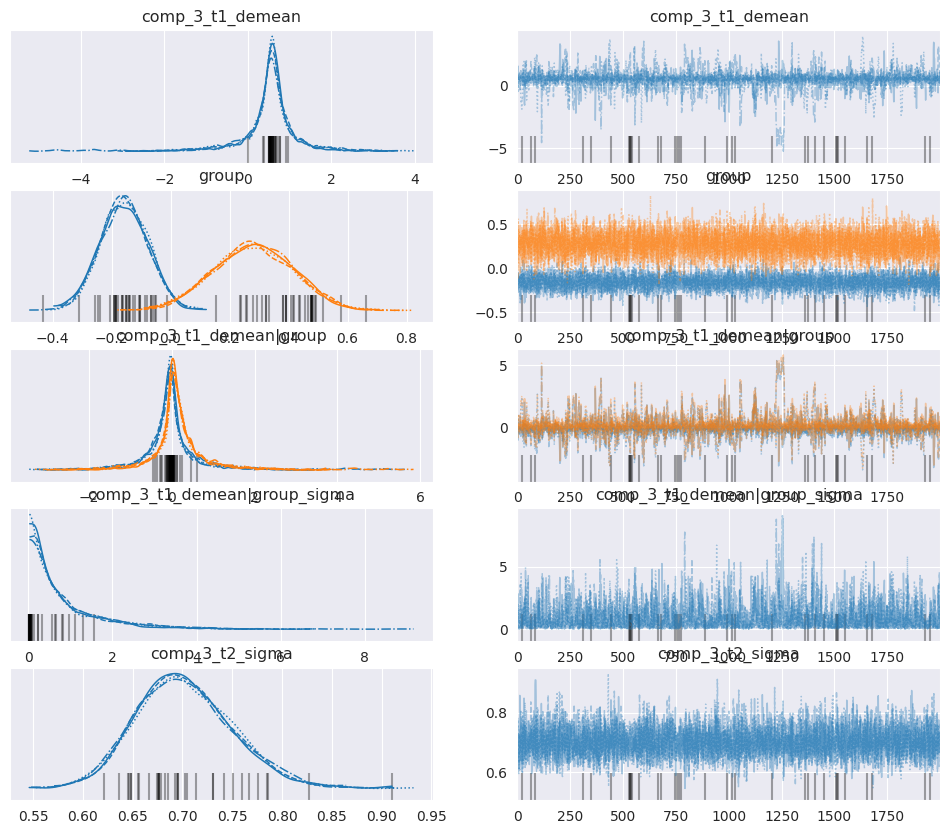

In [18]:
for model in comp:
    az.plot_trace(fitted_models['alternative'][model])

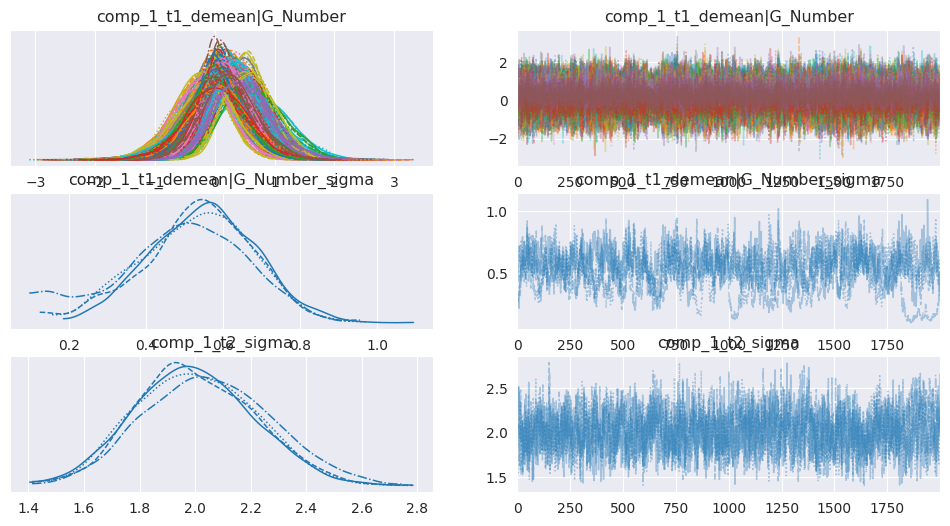

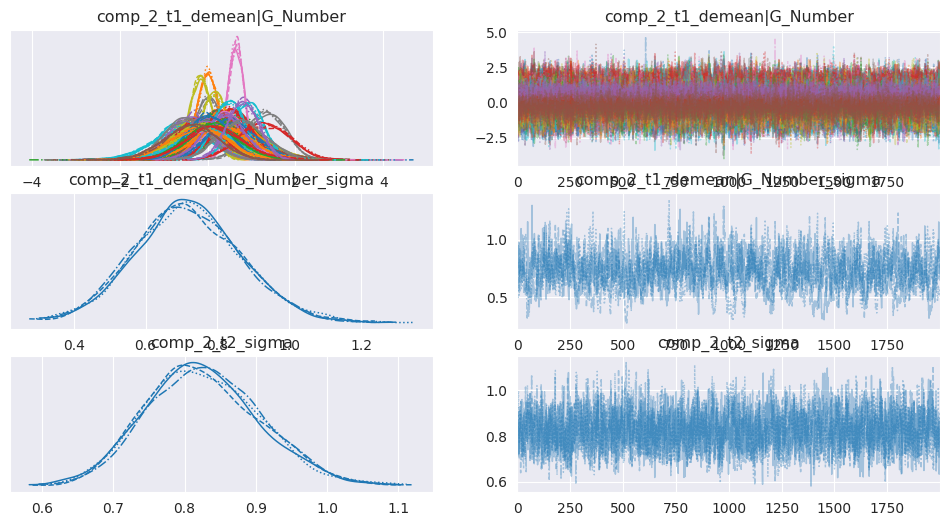

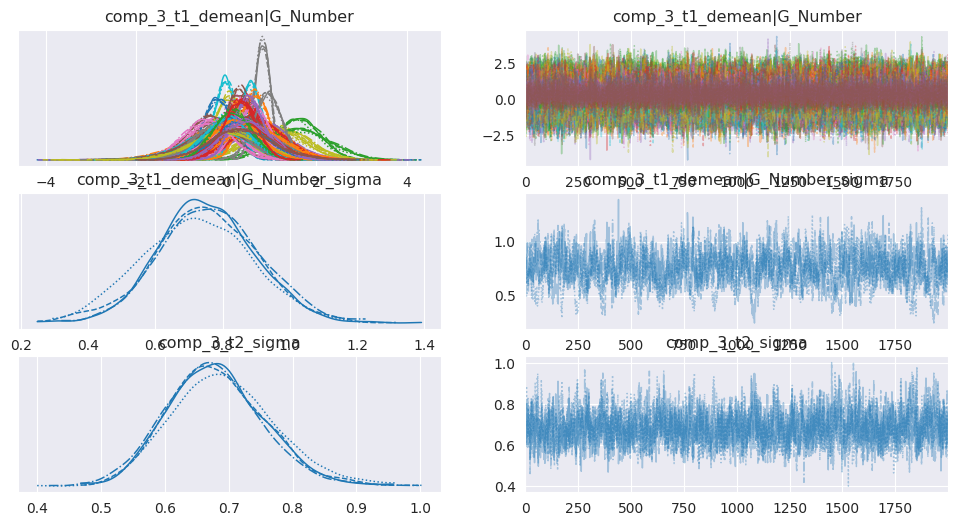

In [19]:
for model in comp:
    az.plot_trace(fitted_models['null'][model])

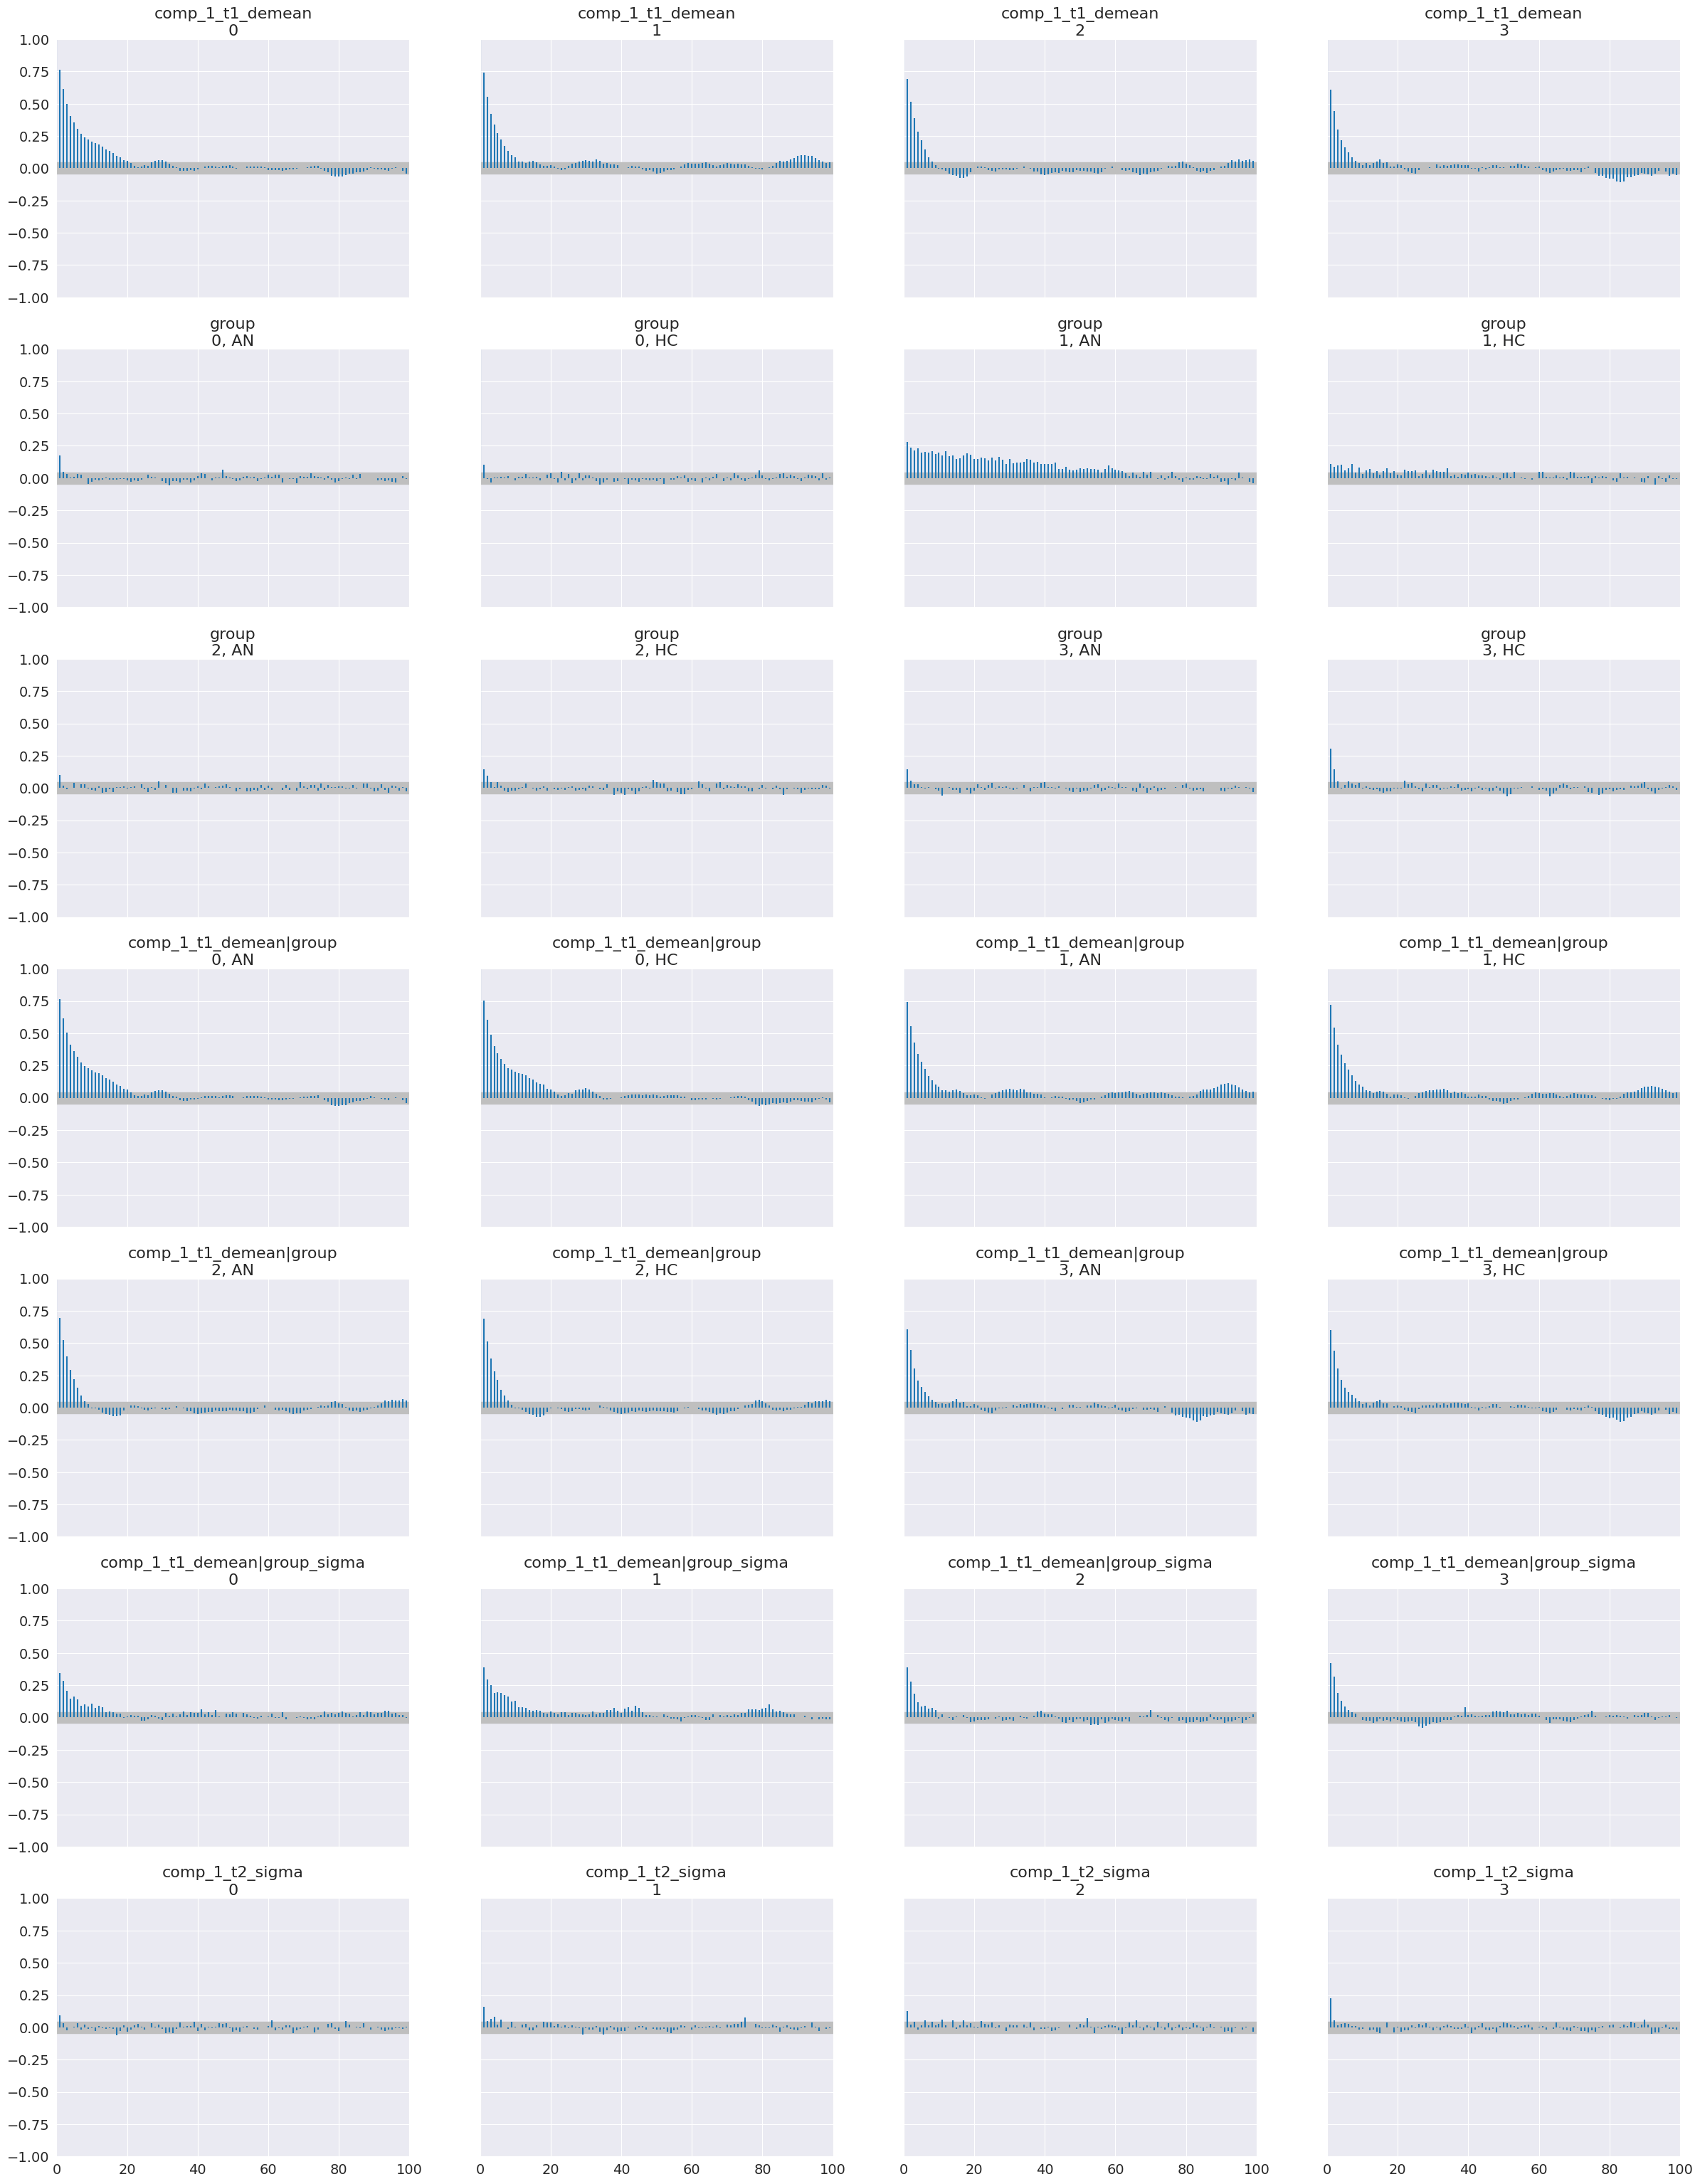

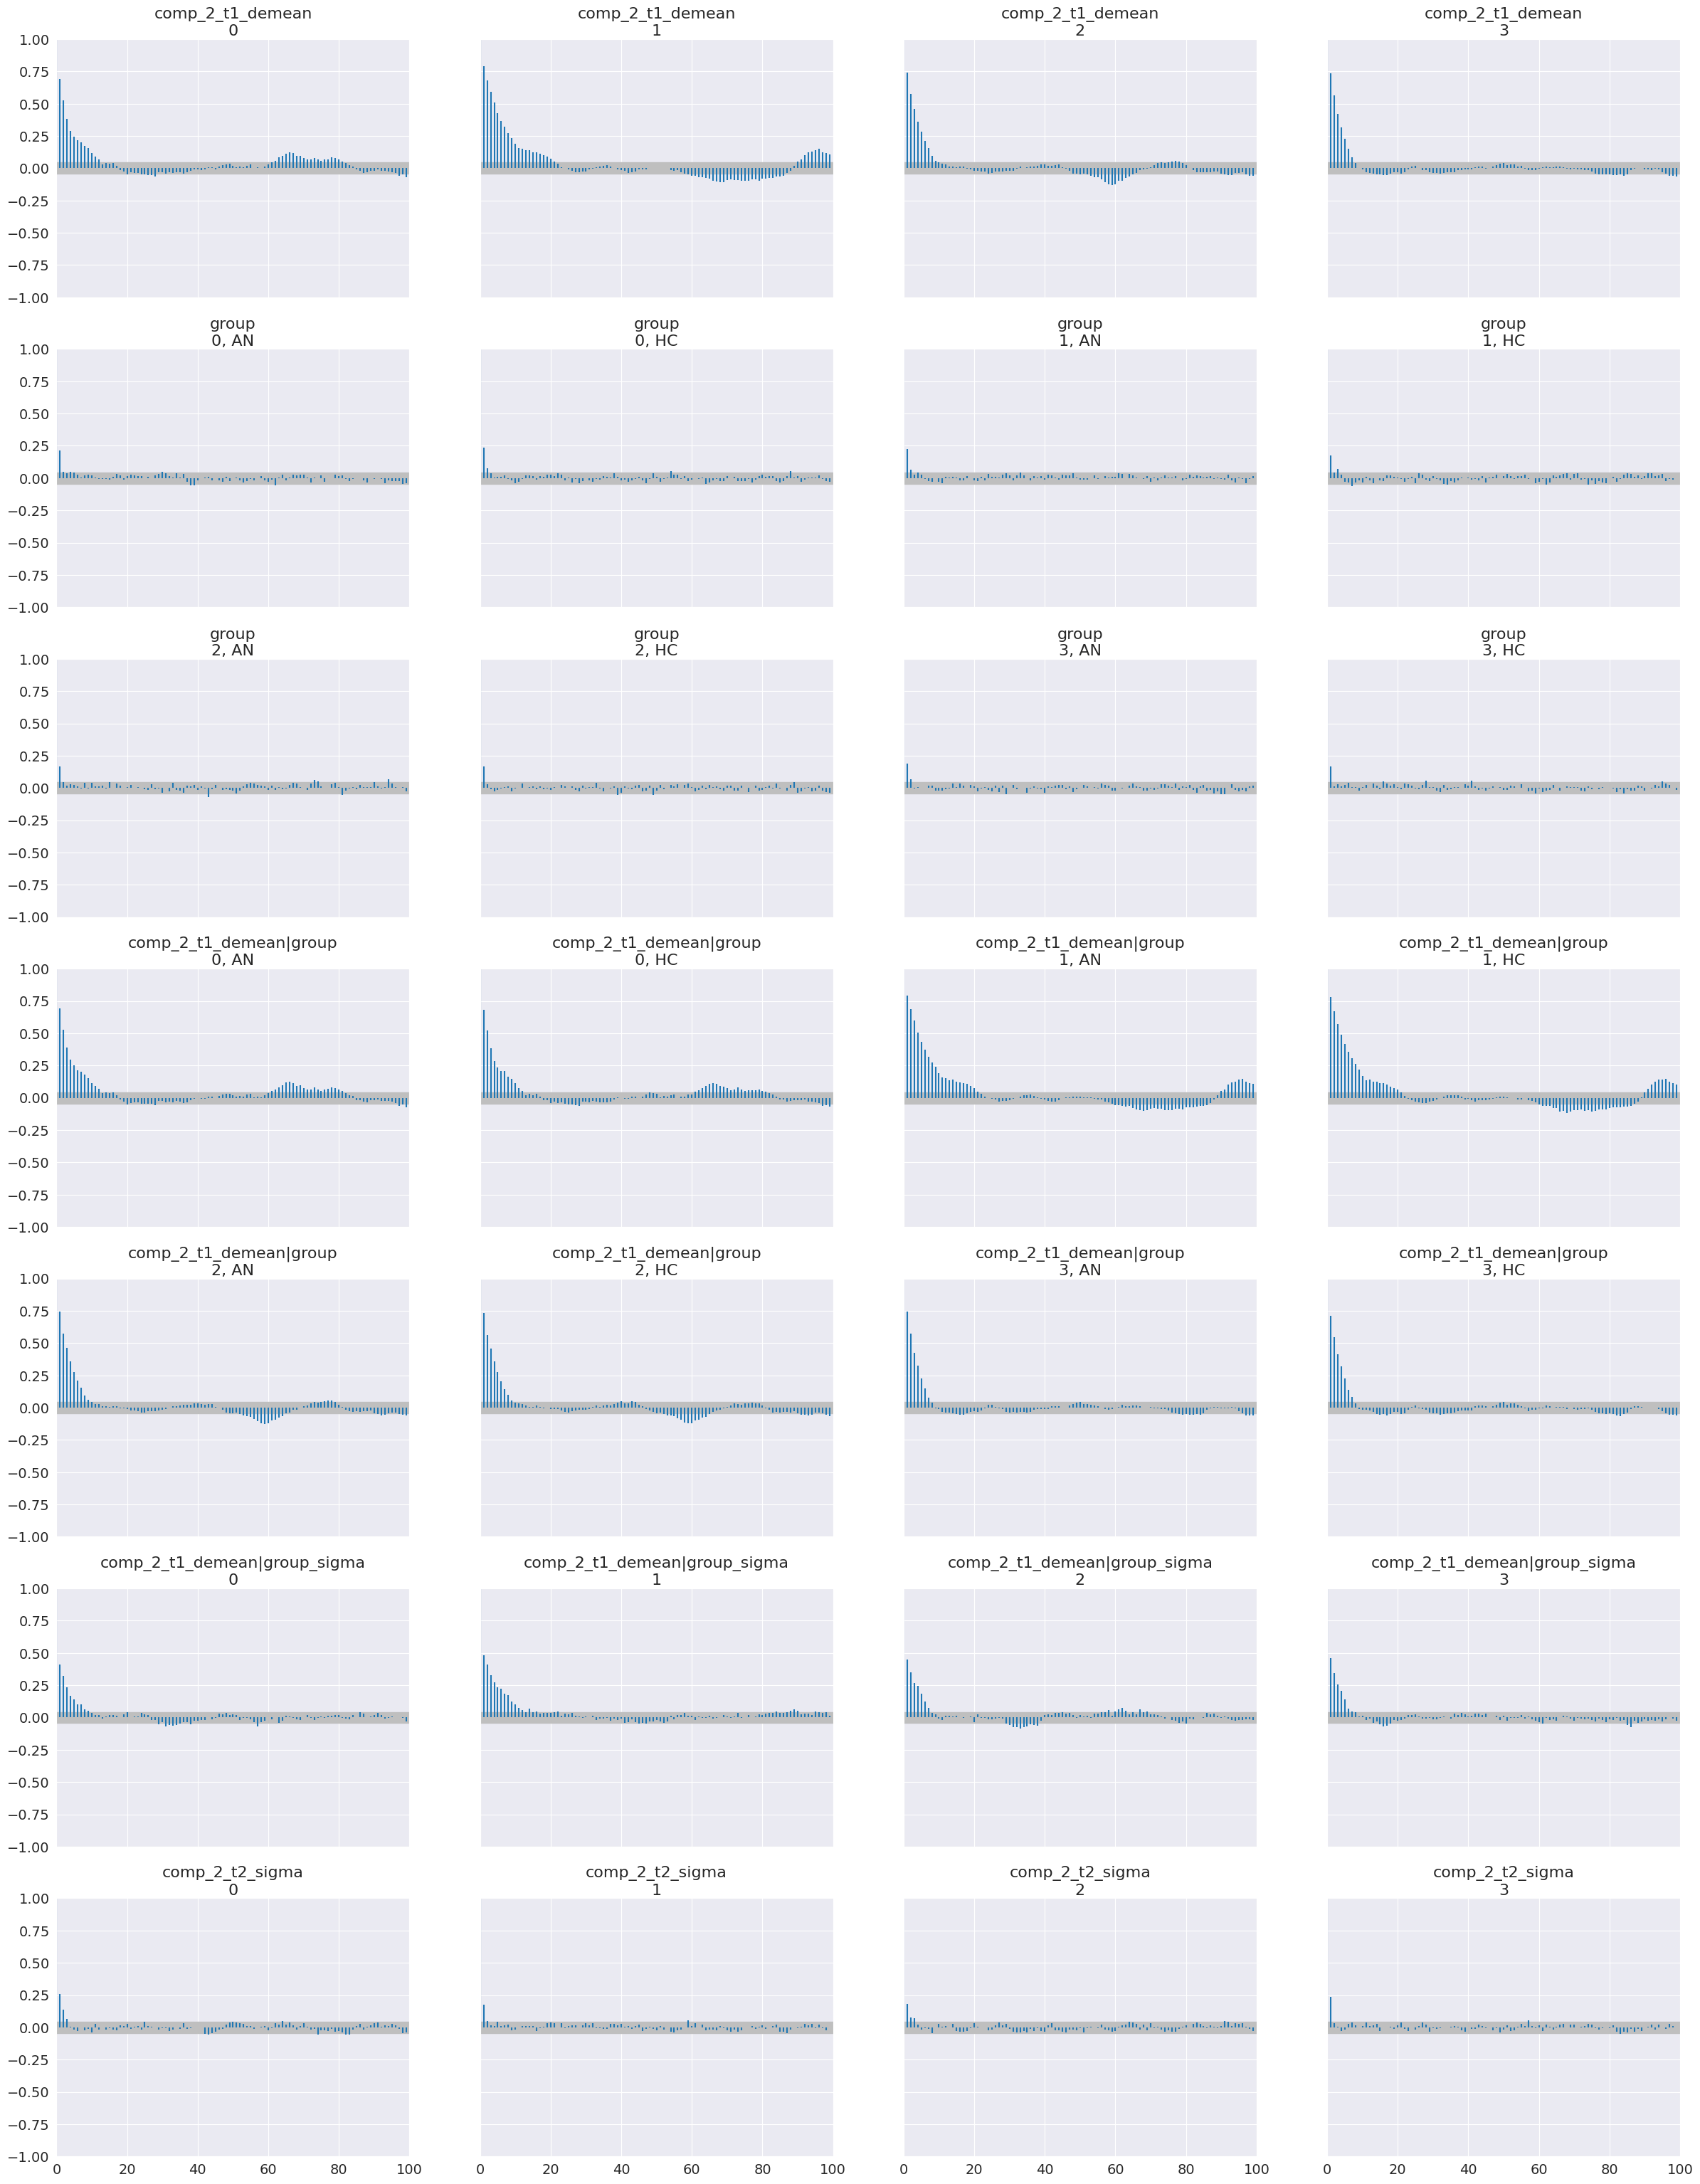

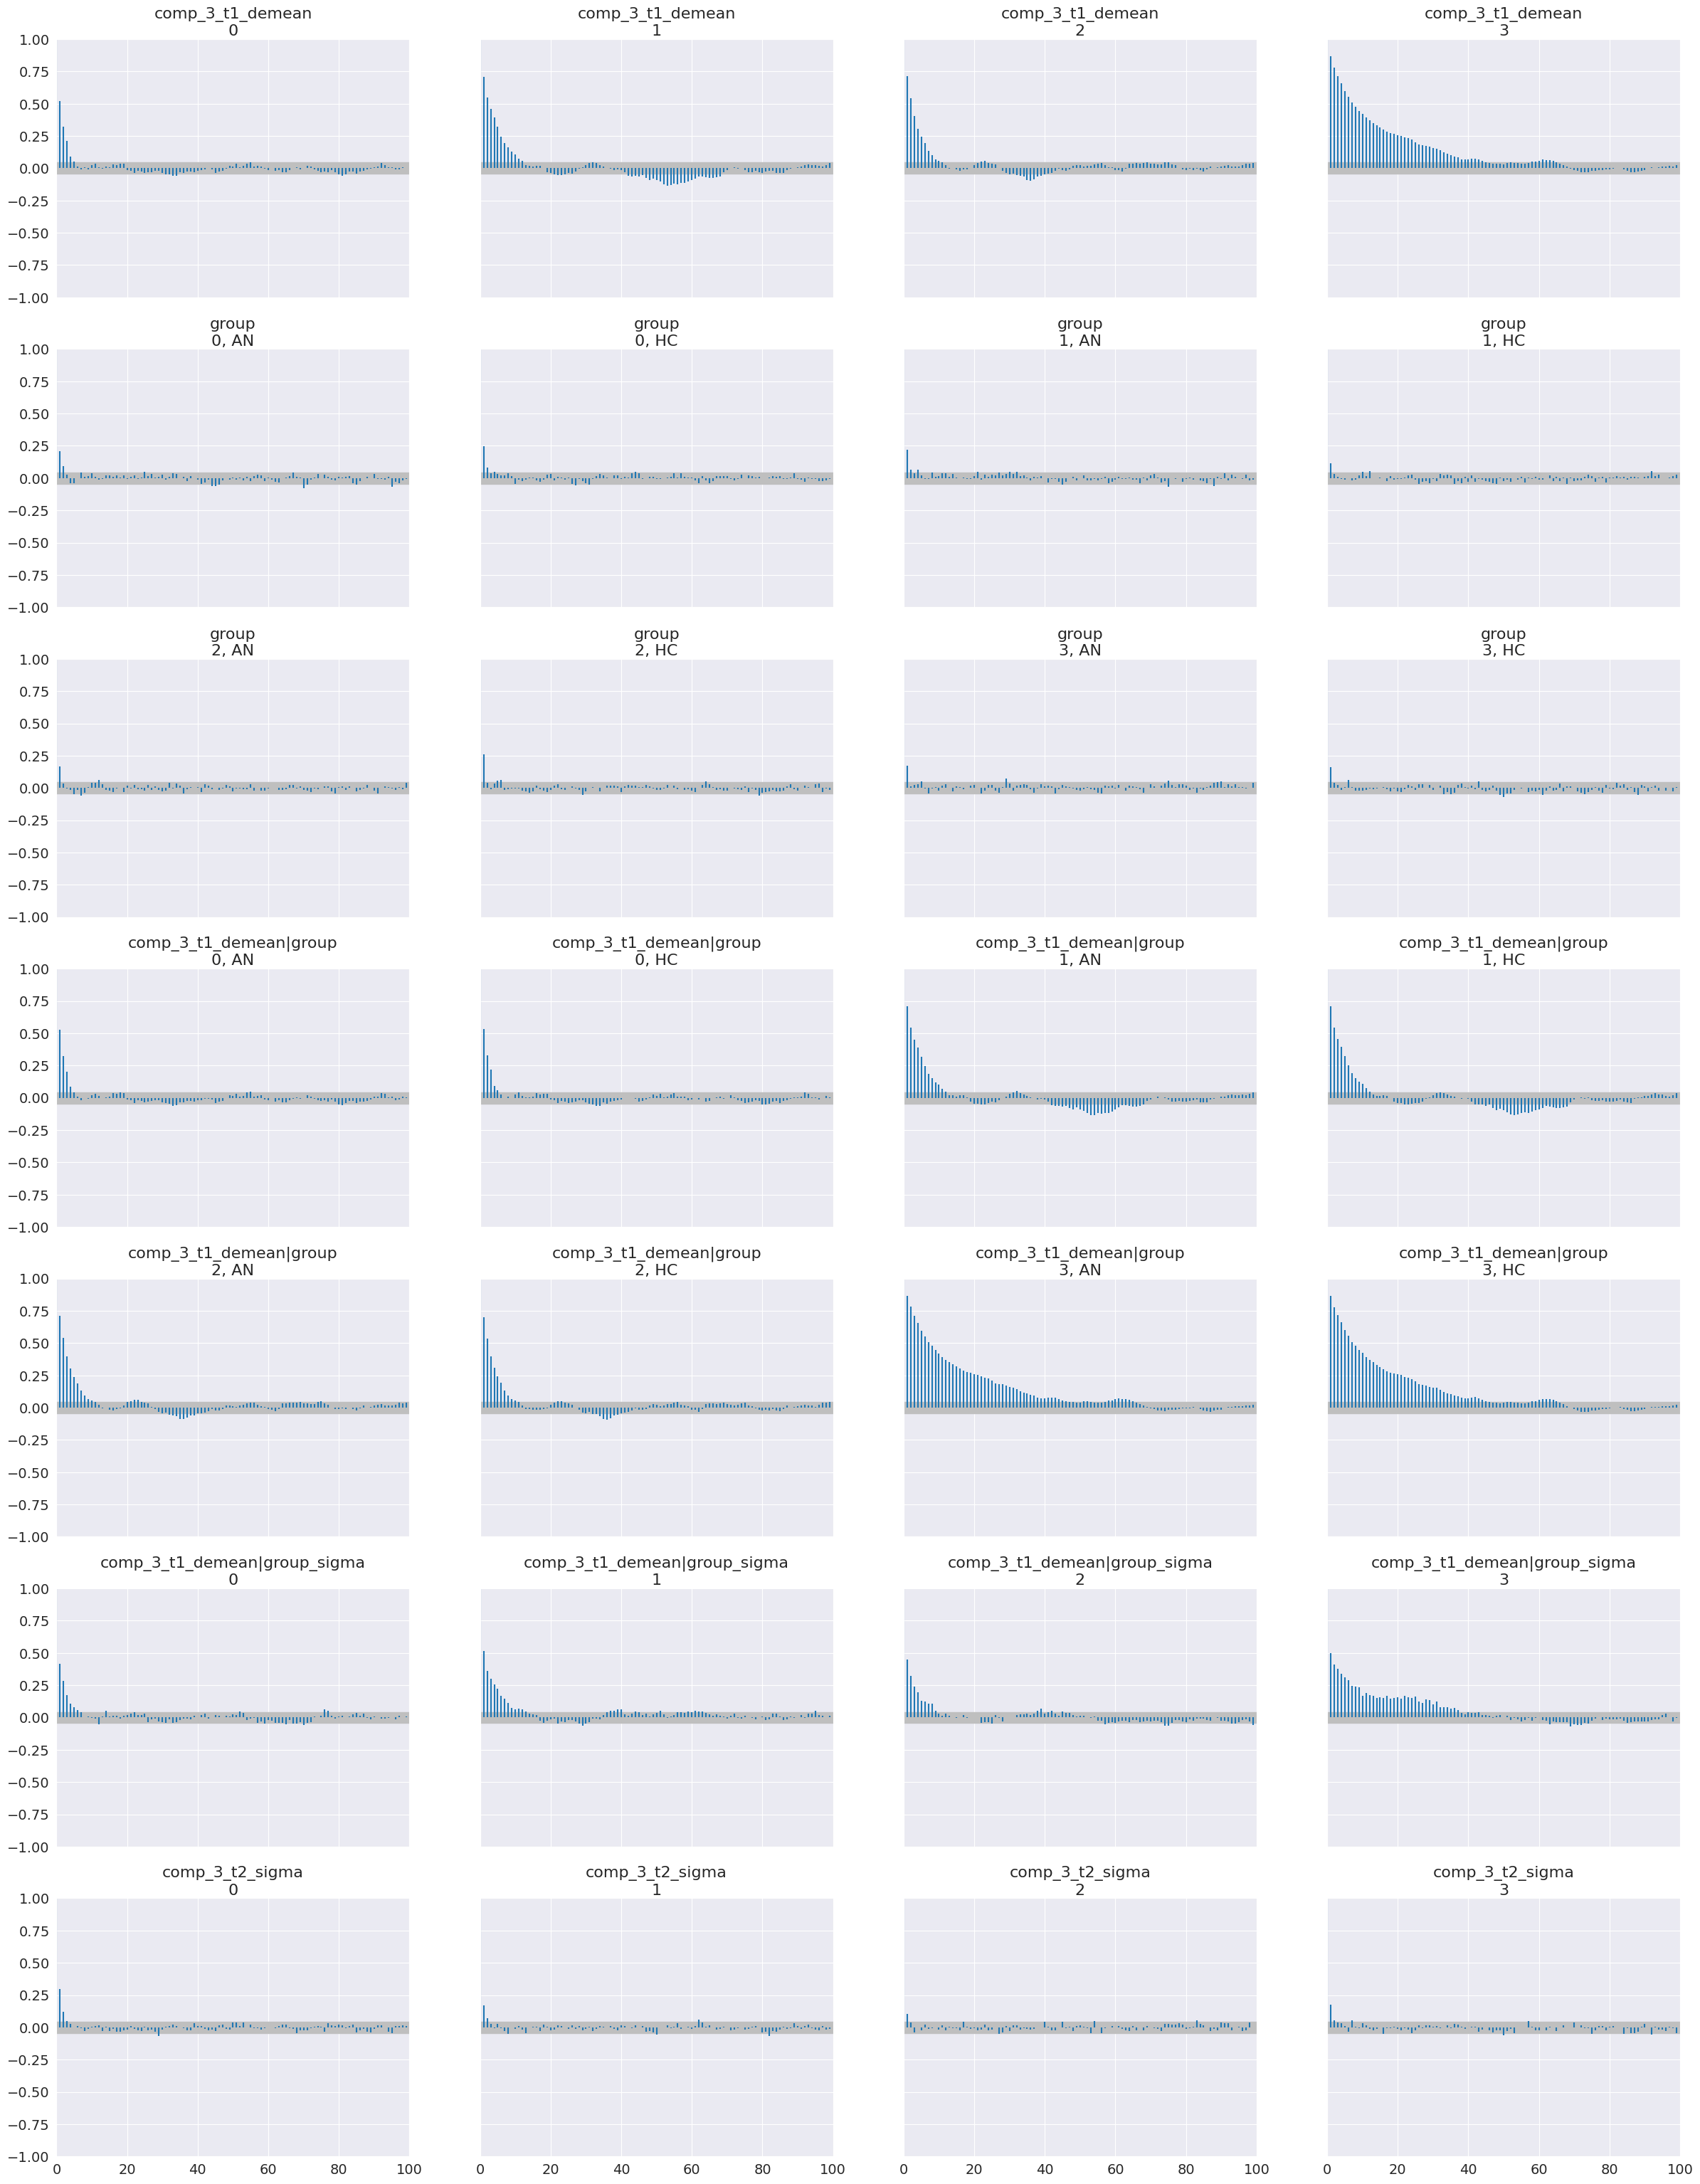

In [20]:
for model in comp:
    az.plot_autocorr(fitted_models['alternative'][model])

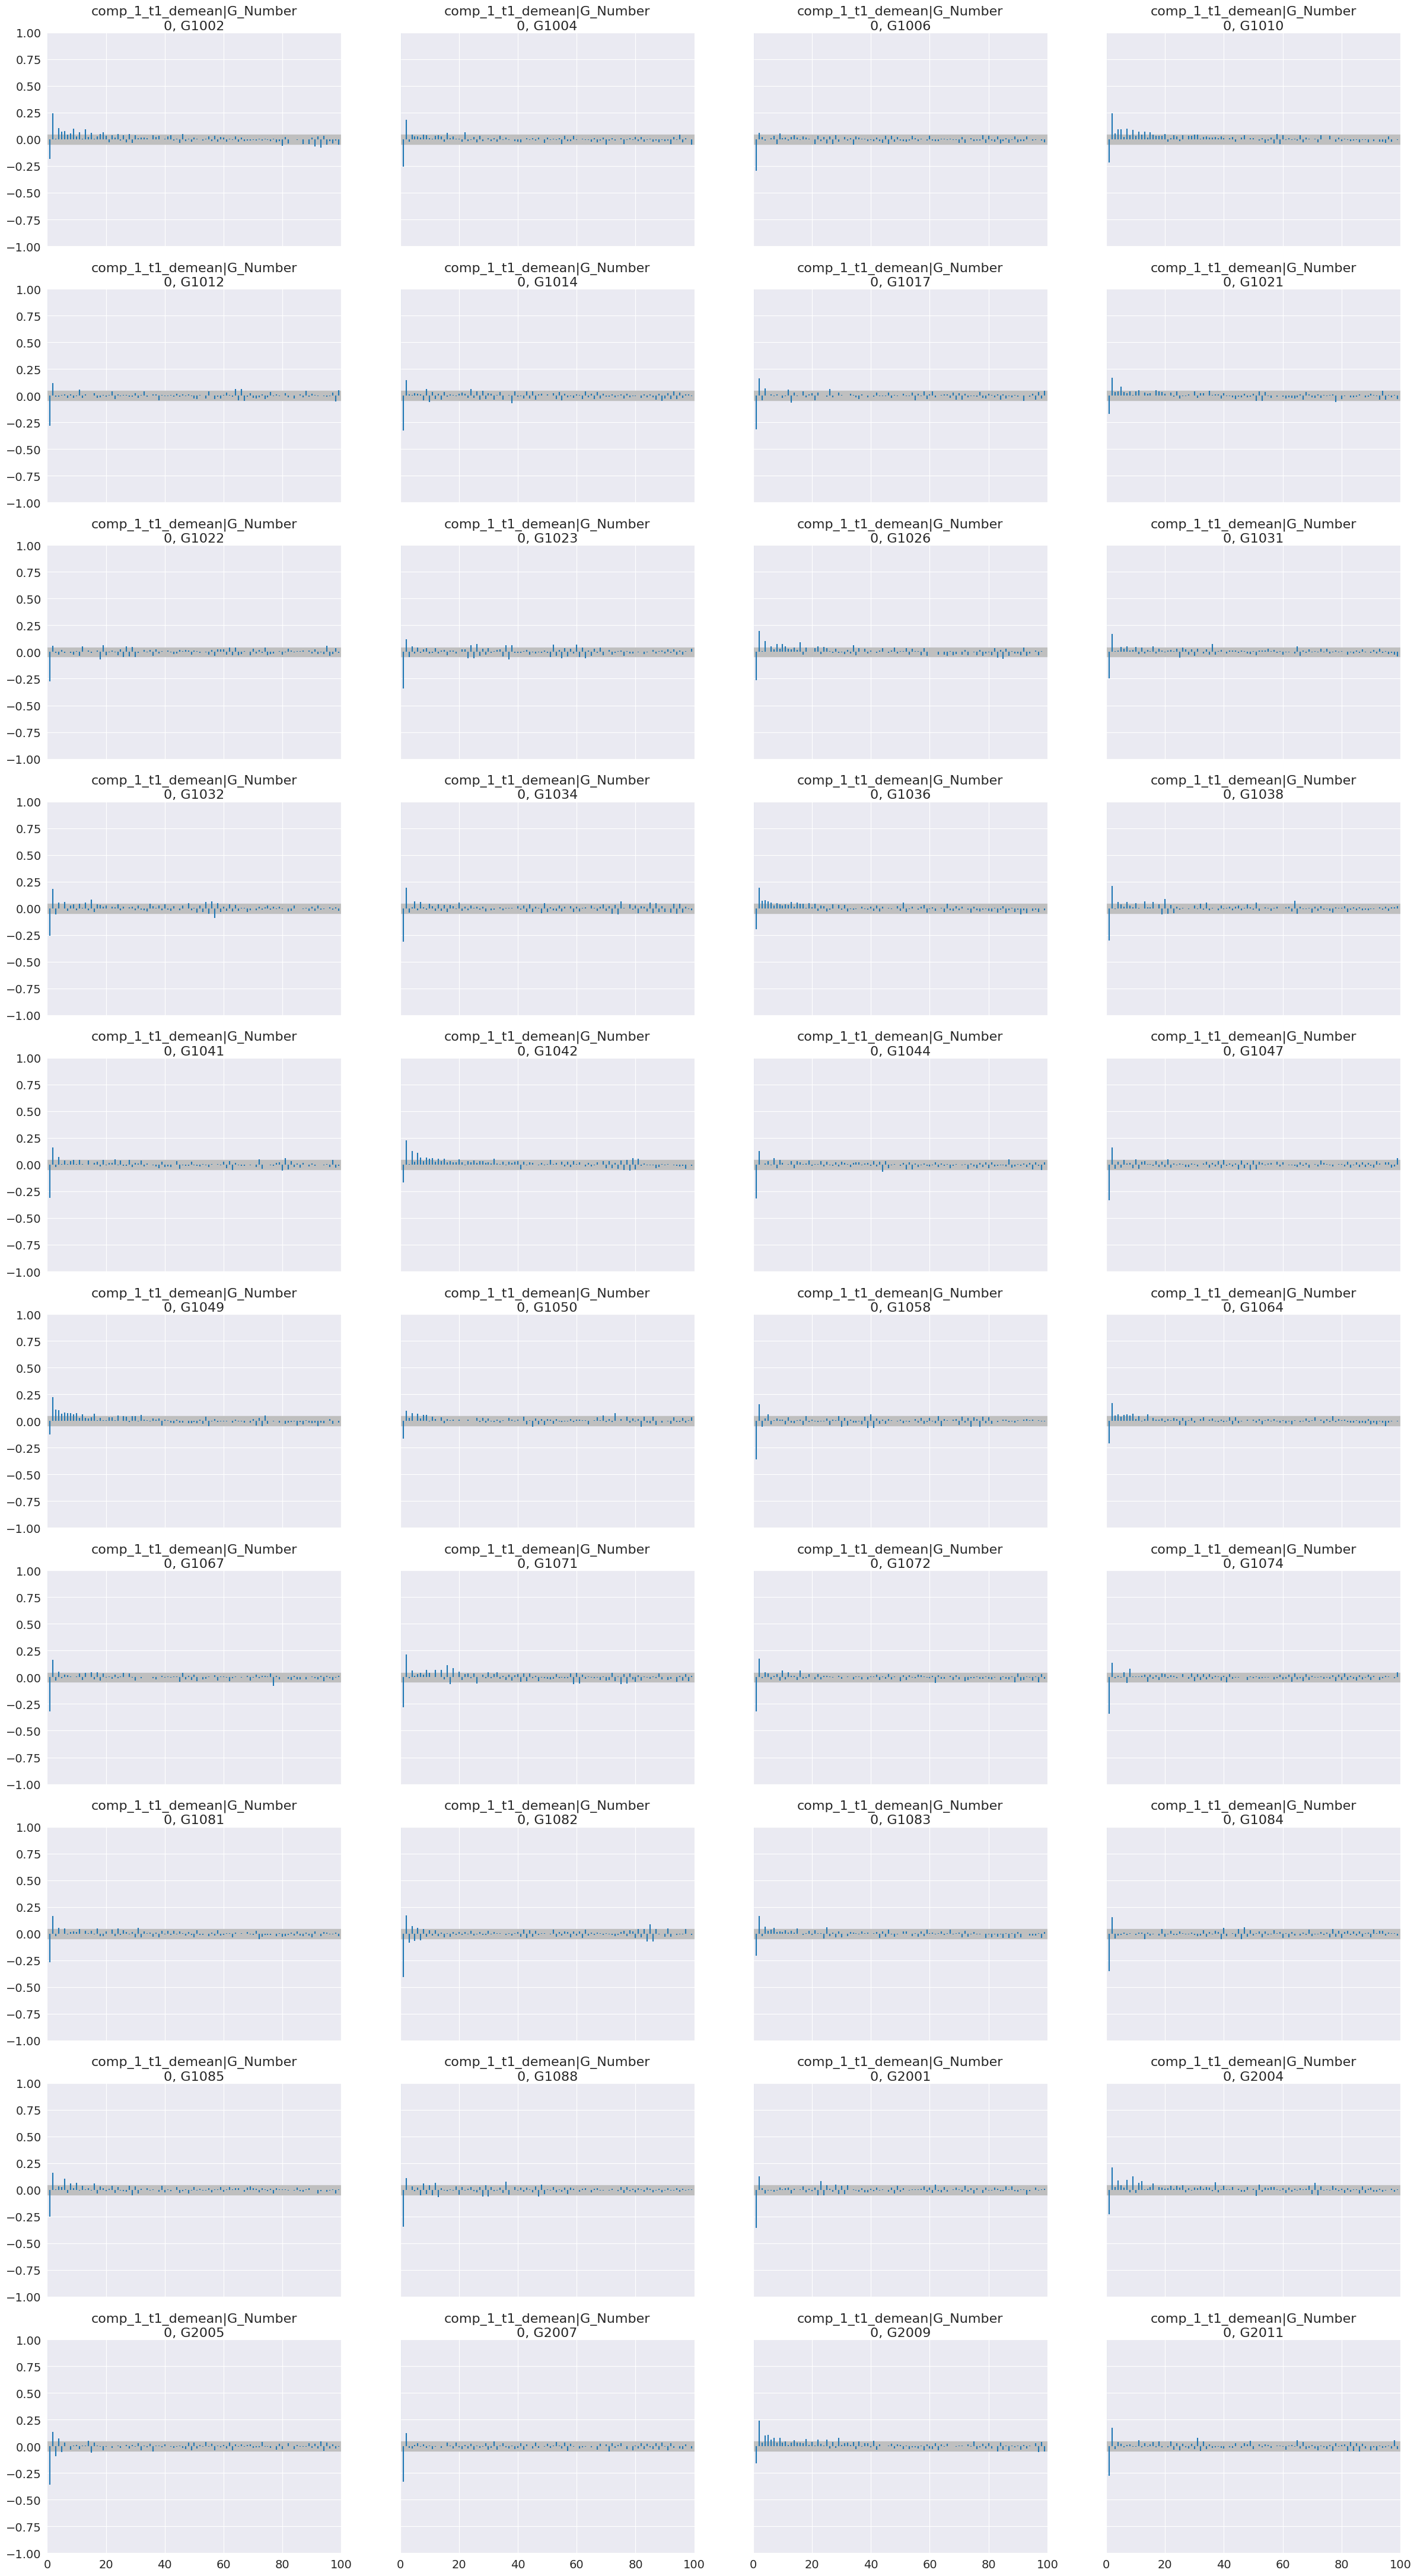

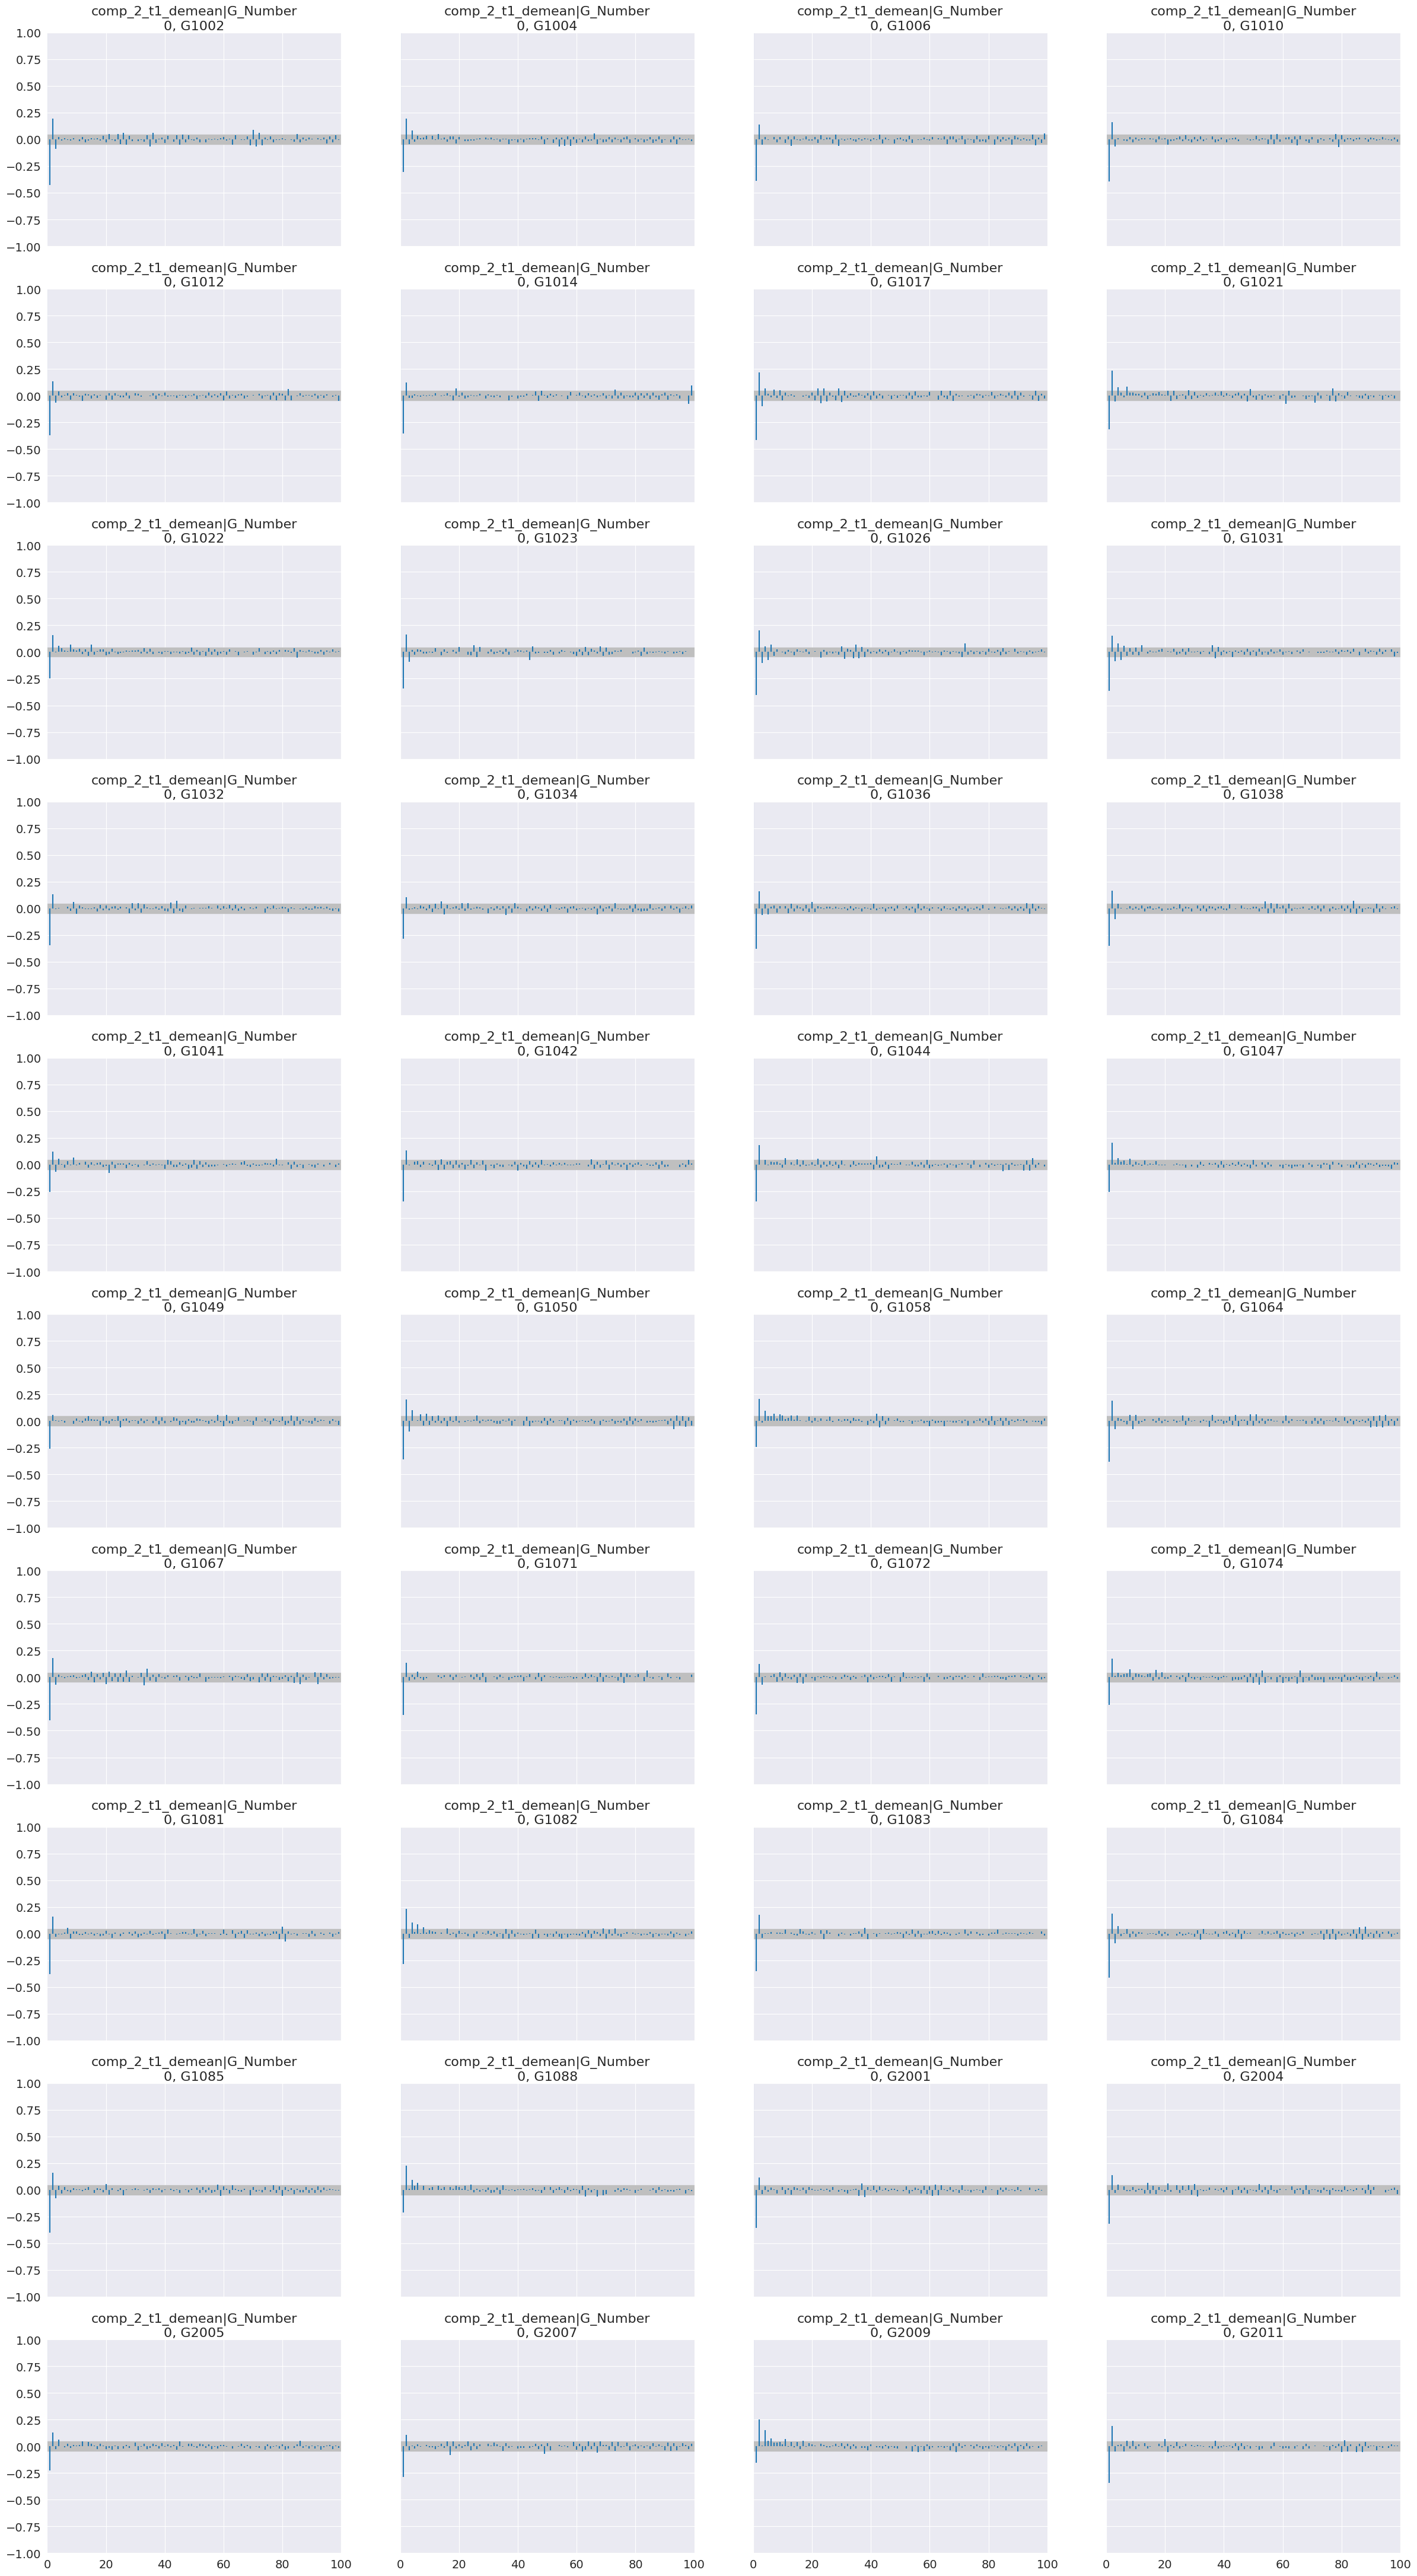

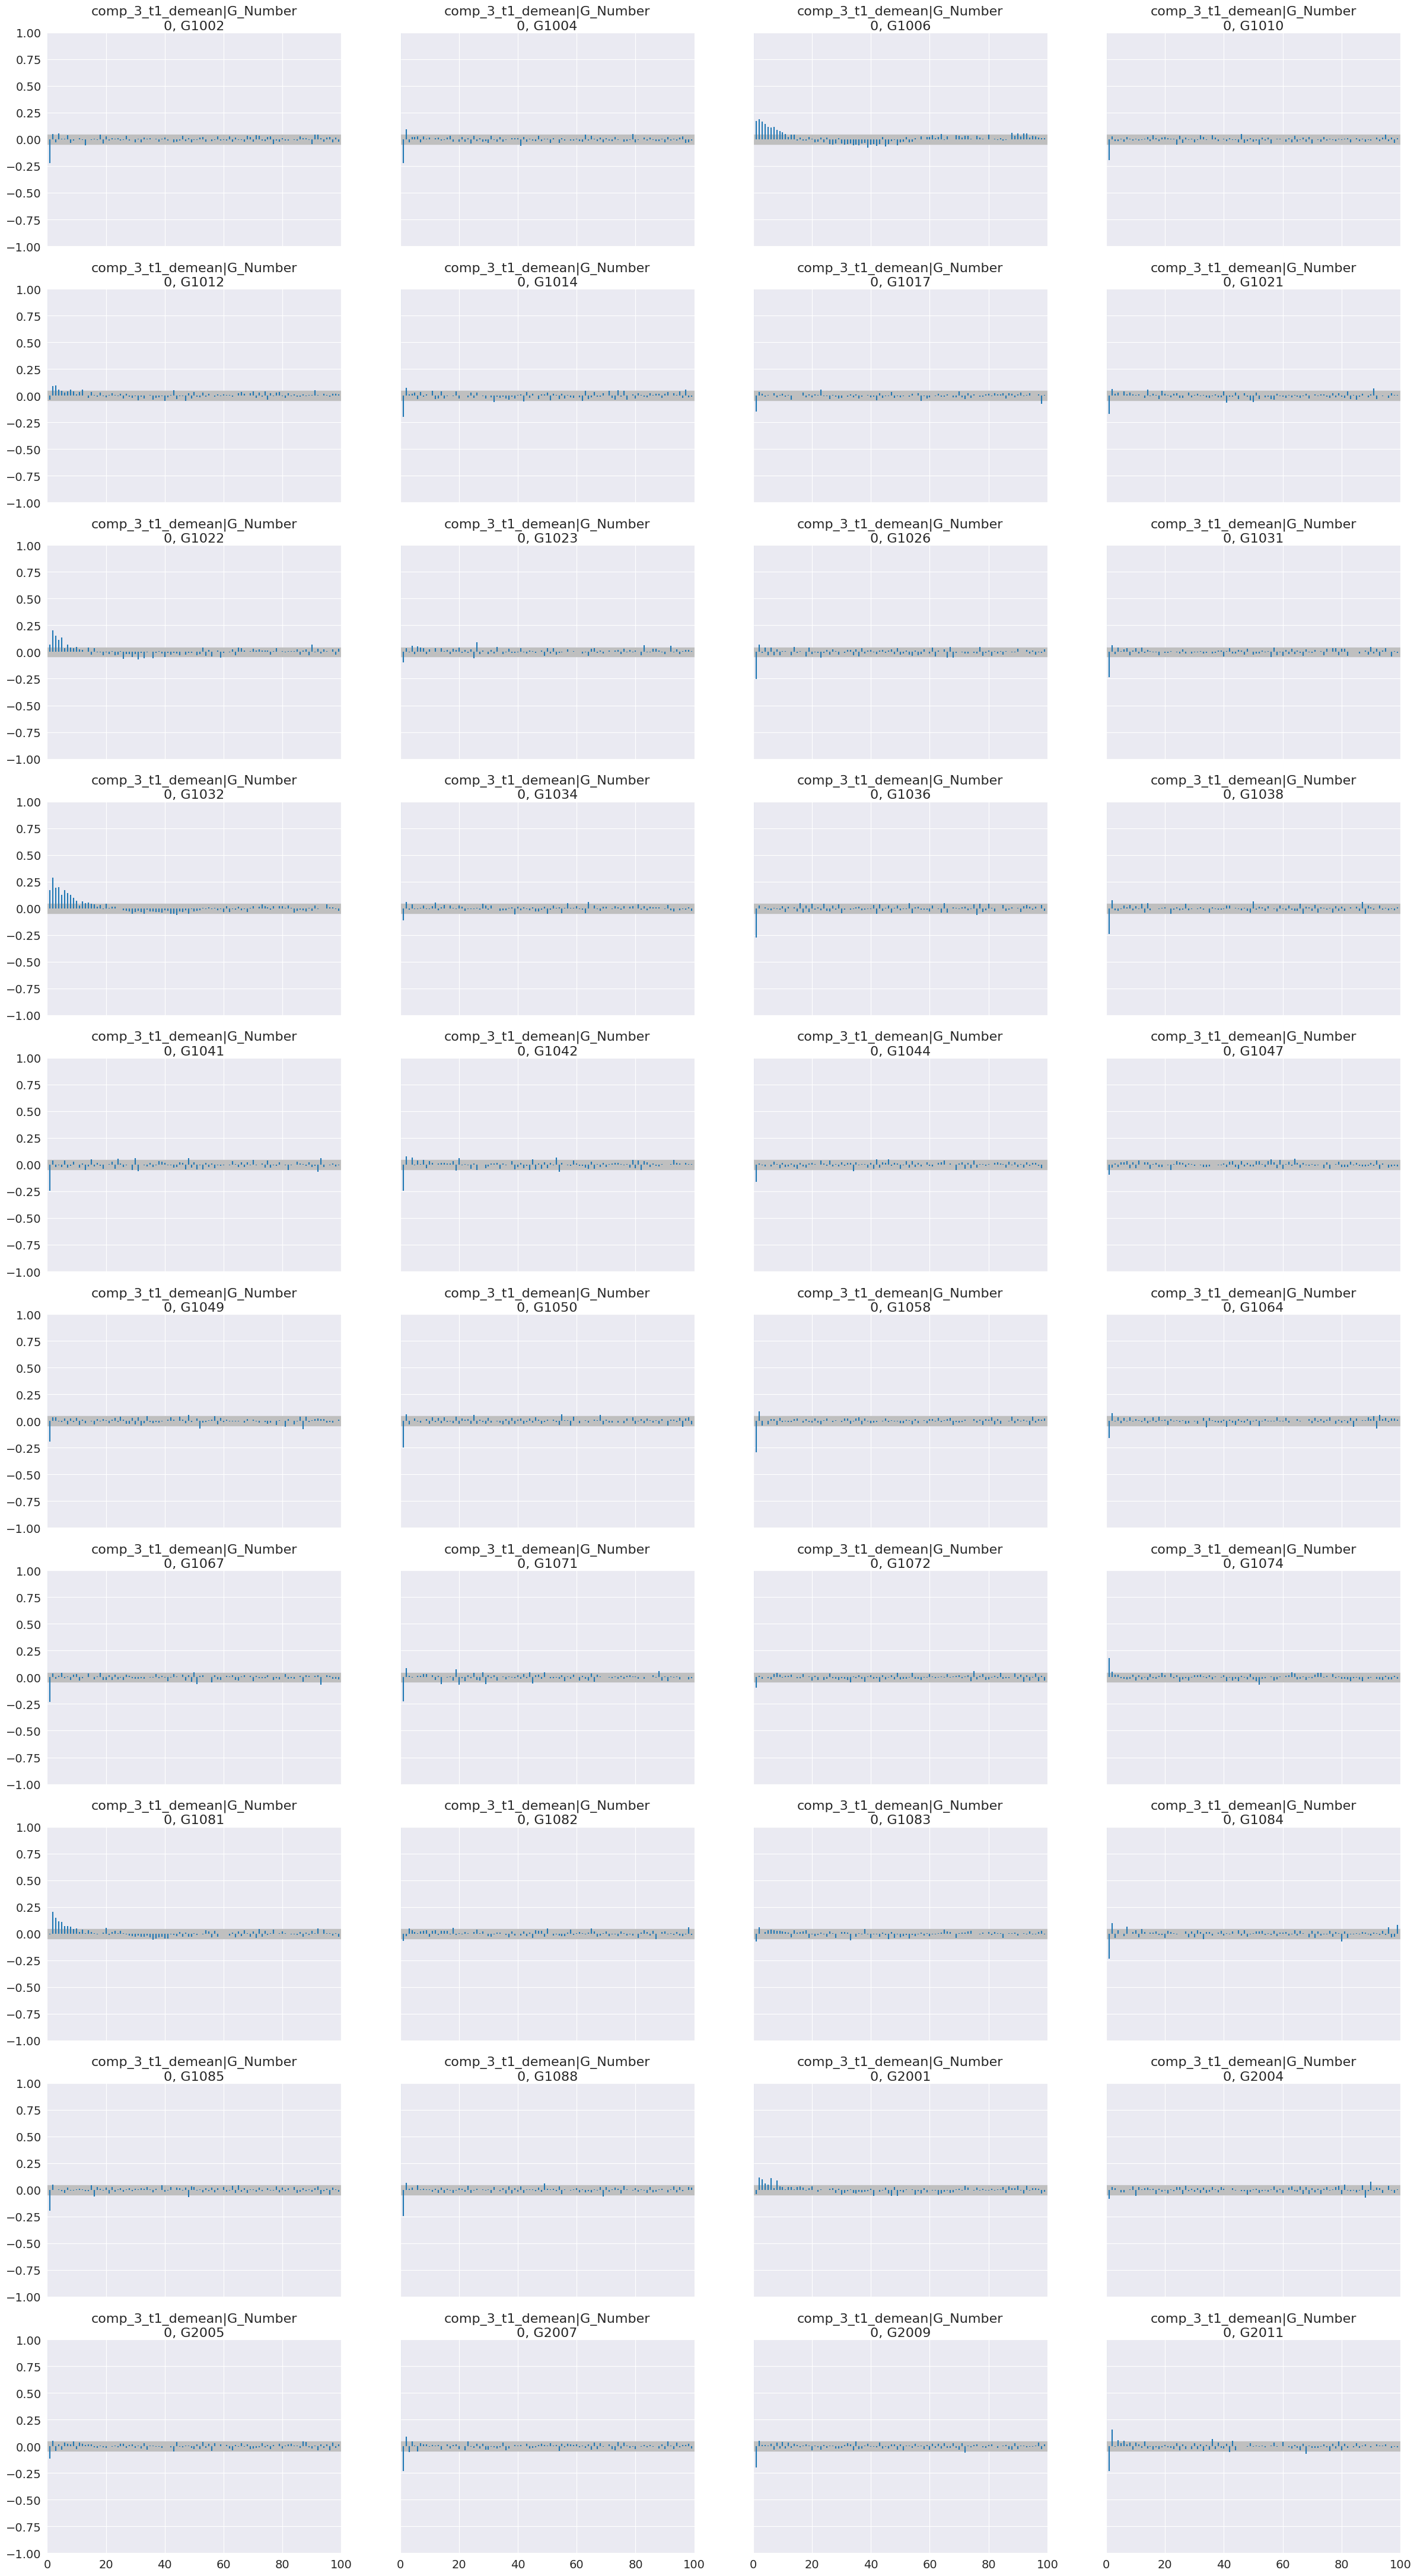

In [21]:
for model in comp:
    az.plot_autocorr(fitted_models['null'][model])

In [22]:
model_summary = {}

for component in comp:
    summary = az.summary(fitted_models['alternative'][component], hdi_prob=0.9)
    model_summary[component] = summary

In [23]:
save_pickle('model_summary_group', model_summary )

In [48]:
fitted_models = load_pickle('fitted_models')

In [24]:
import statsmodels.api as sm

data = pd.concat([pd.get_dummies(pca_df['group']), pca_df], axis=1).rename(columns={'AN':'group[AN]', 'HC':'group[HC]'}).dropna()
slopes = {}

for component in comp:
    # the names of the predictors
    varnames = ['group[AN]', 'group[HC]', f'{component}_t1_demean']
    
    # compute the needed statistics like R-squared when each predictor is response and all the
    # other predictors are the predictor
    
    # x_matrix = common effects design matrix (excluding intercept/constant term)
    terms = [t for t in models['alternative'][component].common_terms.values() if t.name != "Intercept"]
    x_matrix = [pd.DataFrame(x.data, columns=x.levels) for x in terms]
    x_matrix = pd.concat(x_matrix, axis=1)
    x_matrix.columns = varnames
    
    dm_statistics = {
        'r2_x': pd.Series(
            {
                x: sm.OLS(
                    endog=x_matrix[x],
                    exog=sm.add_constant(x_matrix.drop(x, axis=1))
                    if "Intercept" in models['alternative'][component].term_names
                    else x_matrix.drop(x, axis=1),
                )
                .fit()
                .rsquared
                for x in list(x_matrix.columns)
            }
        ),
        'sigma_x': x_matrix.std(),
        'mean_x': x_matrix.mean(axis=0),
    }
    r2_x = dm_statistics['r2_x']
    sd_x = dm_statistics['sigma_x']
    r2_y = pd.Series([sm.OLS(endog=data[f'{component}_t2'],
                             exog=sm.add_constant(data[[p for p in varnames if p != x]])).fit().rsquared
                      for x in varnames], index=varnames)
    sd_y = pca_df[f'{component}_t2'].std()
    
    # compute the products to multiply each slope with to produce the partial correlations
    slope_constant = (sd_x[varnames] / sd_y) * ((1 - r2_x[varnames]) / (1 - r2_y)) ** 0.5
    slopes[component] = slope_constant

In [25]:
correlation_coeffients = dict(zip([component for component in comp], [dict for component in comp]))

for component in comp:
    sample = fitted_models['alternative'][component].posterior['group']


    correlation_coeffients[component] = {
        'an_joint_posterior_distribution': sample.sel(group_dim="AN") * slopes[component]['group[AN]'],
        'hc_joint_posterior_distribution' : sample.sel(group_dim="HC") * slopes[component]['group[HC]'],
        'comp_joint_posterior_distribution' : fitted_models['alternative'][component].posterior[f'{component}_t1_demean'] * slopes[component][f'{component}_t1_demean']
    }

In [ ]:
save_pickle('correlation_coeffients_group', correlation_coeffients)